# Simple ARIMA model for non-seasonal time-serie forecast

Our goal in this challenge is to apply the basic concepts of time series analysis on one-dimension data

In this challenge, we'll go through the following steps : 
1. load and visualize the data;
2. train our models and make predictions;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

##  1. Load Data and Plot Time Series
Let's start by loading the time series of the challenge and plot the time series

In [2]:
df = pd.read_csv("data/daily_restaurant_sales.csv")
df

,x
0,88
1,84
2,85
3,85
4,84
...,...
95,222
96,228
97,226
98,222


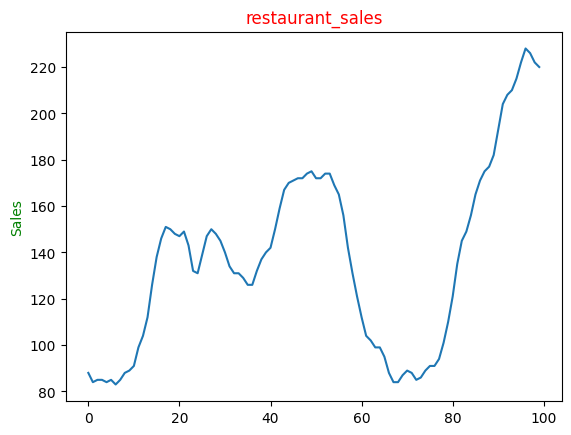

In [3]:
plt.subplot()
plt.plot(df)
plt.title("restaurant_sales", c="r")
plt.ylabel("Sales", c="g")
plt.show()

This abstract time serie does not seem seasonal, but with some increasing trend and somehow "sticky" (i.e. with some auto-regressivity). So it may be a good candidate for Auto-Regresive Moving Average (ARIMA) models


L'**auto-régressivité** est une propriété statistique qui décrit la relation entre les valeurs d'une série temporelle et ses valeurs antérieures. Une série temporelle est auto-régressive si elle peut être prédite en utilisant des valeurs passées de la même série.

## 2. Build ARIMA model
We will try to forecast the data thanks to ARIMA models (Auto Regressive Integrated Moving Average).

For that, we will need to :
1. find how to stationarize the time serie (I in SARIMA)
2. find the auto-regressive (AR) part
3. find the Moving-Average (MA) part
4. Fit
5. Assess performance

### Step 1 - Ensure stationarity

ARIMA models applies to "stationary" time series only.

👉 Check its stationarity precisely using the [`Augmented Dick Fuller test`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html), and especially its p-value

In [4]:
res= statsmodels.tsa.stattools.adfuller(df, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
res

(-2.464239717203368,
 0.12441935447109481,
 3,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 444.67104090432554)

In [5]:
print("statistique globale: ", res[0])

print("p-value : ", res[1])

print("nombre de décalages (dépend de la taille de l'échantillon et du paramètre maxlag passé à la fonction)", res[2])

print("nombre d'observations dans la série chronologique", res[3])

print("valeurs critiques pour les niveaux de signification", res[4])

print("information de critère d'Akaike (AIC)", res[5])

statistique globale:  -2.464239717203368
p-value :  0.12441935447109481
nombre de décalages (dépend de la taille de l'échantillon et du paramètre maxlag passé à la fonction) 3
nombre d'observations dans la série chronologique 96
valeurs critiques pour les niveaux de signification {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}
information de critère d'Akaike (AIC) 444.67104090432554


The p-value should be  less than 0.05 to have a 95% confidence in the stationarity.  
If the p-value is larger than 0.05, we cannot reject the null hypothesis (null hypothesis = "the process is not stationary").

If the time series is not stationary, it needs to be stationarized through **differencing**. 
- It means that we take the difference between each value and the preceding one (*first difference*).
- Repeat process on the differentiated serie if you want the *second difference*, etc...

👉 Find the minimum order of differencing we need to make it stationnary (plot the curves to visualize them, and print their adfuller p-value to be sure)

<details>
    <summary>Hint</summary>

`pd.Series.diff`
</details>

C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


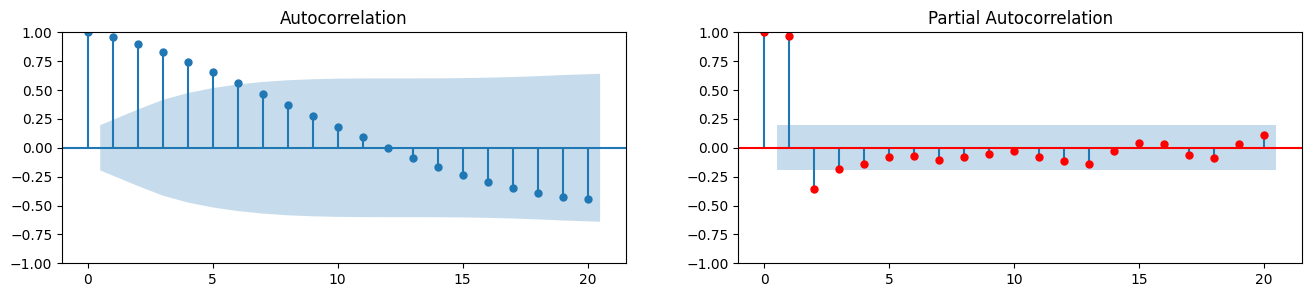

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig, axes = plt.subplots(1, 2, figsize=(16, 3))
plot_acf(df, ax=axes[0]);
plot_pacf(df, ax=axes[1], c='r');
plt.show()

C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


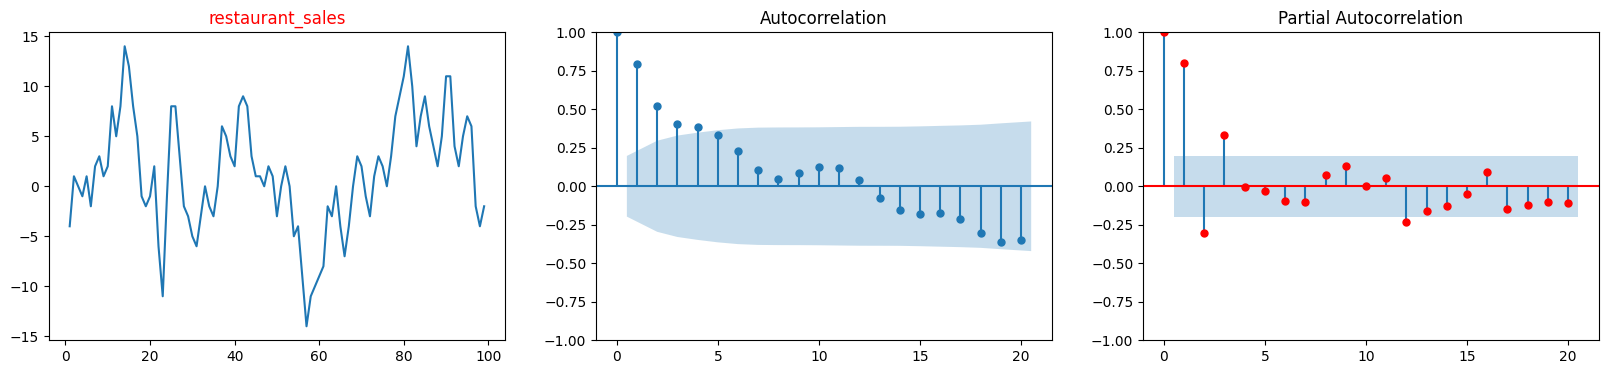

In [7]:
diff_1= df.diff()
diff_1= diff_1.dropna()

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
axes[0].plot(diff_1), axes[0].set_title("restaurant_sales", c="r")
plot_acf(diff_1, ax=axes[1]);
plot_pacf(diff_1, ax=axes[2], c='r');
plt.show()

In [8]:
res_1= statsmodels.tsa.stattools.adfuller(diff_1, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
res_1

(-2.7222384904429515,
 0.07026846015272718,
 2,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 438.89606128026)

C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


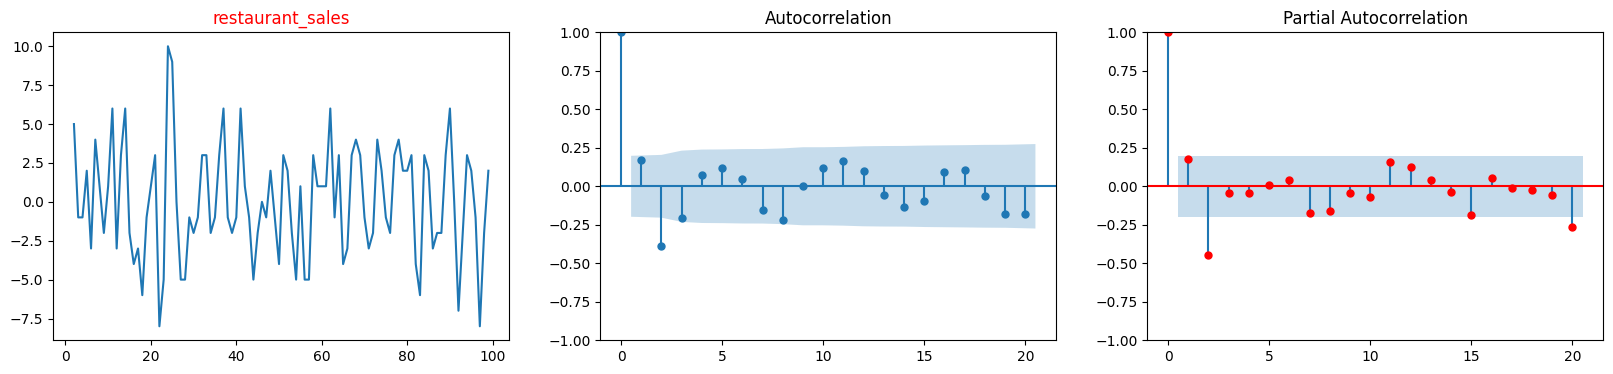

In [10]:
diff_2= diff_1.diff()
diff_2=diff_2.dropna()

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
axes[0].plot(diff_2), axes[0].set_title("restaurant_sales", c="r")
plot_acf(diff_2, ax=axes[1]);
plot_pacf(diff_2, ax=axes[2], c='r');
plt.show()

We have a close-call here between one and two diff orders. Differentiating too much a time series may also reduce performance of your ARIMA models. Let's have a closer look:

👉 Plot autocorrelation plot ([`plot_acf`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)) for diff order 1 and 2.

(💡Pro tip: Avoid duplicating statsmodels plots by calling `plt.show()` or by adding `;` to the end of each instantiation of a statsmodels plot)

In [11]:
res_2= statsmodels.tsa.stattools.adfuller(diff_2, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
res_2

(-9.929762173626015,
 2.8434287555471576e-17,
 1,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 438.2804466027877)

In our "second order diff" autocorrelation plot, the lag coefficient n°1 is close to 0, while the second one escapes far into negative territory. This might indicate we have over-differentiated the series. (Remember: we never care about the lag n°0 which is always equal to 1)

👉 Let's (temptatively) keep only one diff order and name this series `y_diff` (we can always try more diff later)

In [12]:
y_diff=diff_1

We just found the term "I" in ARIMA: `d = 1` for 1-diff before stationary (I refers to "integration", "d" for differentiation...)


### Step 2 - Select AR order (p) and MA order (q)

#### MA($\color{blue}{q}$) = number of lag beyond which the $\color{blue}{ACF}$ of  $Y^{\color{green}{(d)}}$ cuts off

MA order (`q`) can be found by looking at the autocorrelation plot ([`plot_acf`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)) applied to`y_diff`. 

👉 determine `q`

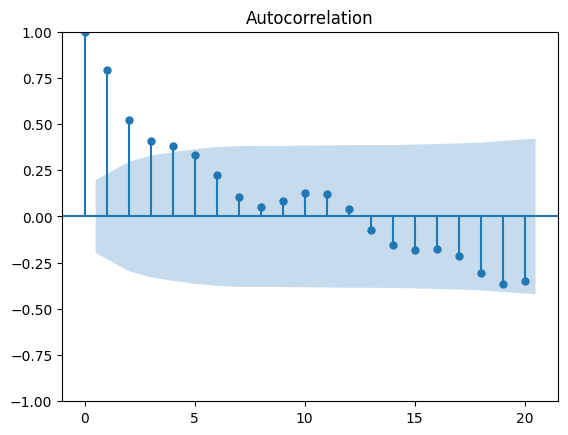

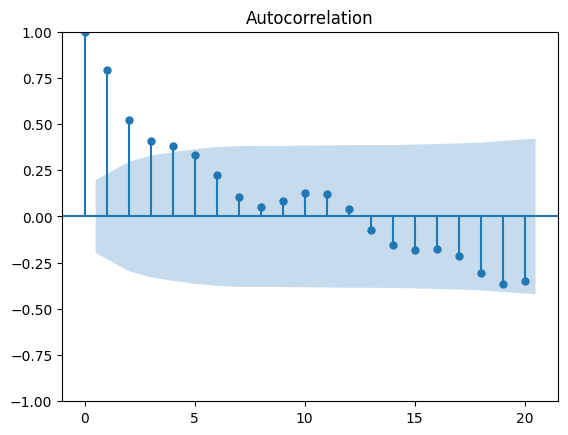

In [13]:
plot_acf(y_diff)

We could choose q = 4, but it's more conservatively to try with `q=2` to start with.

When in doubt, go with the simpler model that sufficiently explains the Y.

#### AR($\color{red}{p}$) = number of lags beyond which the $\color{red}{PACF}$ of $Y^{\color{green}{(d)}}$  cuts off

AR order (`p`) can be found by investigating the **p**artial autocorrelation plot [`plot_pacf`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html) applied to `y_diff`.

(Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series)

👉 Determine `p`

C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


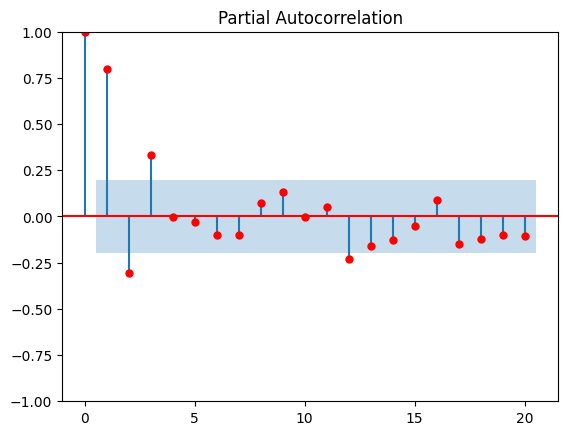

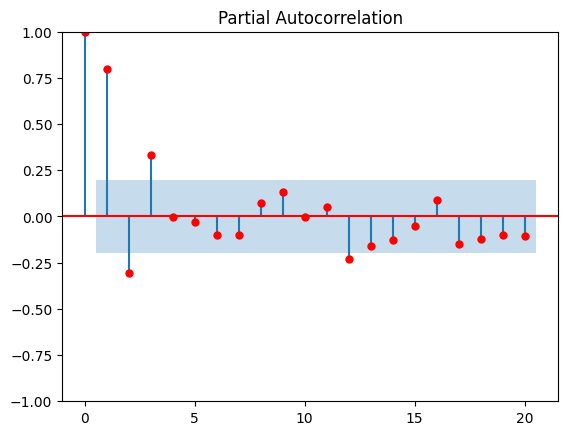

In [14]:
plot_pacf(y_diff, c='r')

We could choose `p = 3` as the first 3 lag terms seems above the significance level, but we could also go with a simpler model `p = 1`. 



### Step 3 - Build the model

Now that you have chosen the values for `p`, ` d` and `q` for the ARIMA, 

👉 build the `arima_model` from `statsmodels`.
- fit the the model
- print the model (`.summary`)

In [15]:
arima = ARIMA(df, order=(1,1,2))
arima = arima.fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Tue, 14 Mar 2023   AIC                            516.253
Time:                        11:56:34   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786
ma.L2         -0.0664      0.157     -0.424      0.671      -0.373       0.241
sigma2         9.7898      1.421      6.889      0.000       7.005      12.575
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.98   Prob(JB):                         0.95
Heteroskedasticity (H):               0.63   Skew:                            -0.07
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

☝️ If your p-values are too high, try remove these terms by reducing the corresponding AR or SA coefficients.

You can evaluate overall performance of your fit by minimizing the [`AIC - akaike information criterion`](https://towardsdatascience.com/the-akaike-information-criterion-c20c8fd832f2) value

It seems that the (1,1,1) ARIMA models have less chance of overfitting (p-values remains low) and maintain a quasi similar AIC score than other models

In [16]:
arima = ARIMA(df, order=(1,1,1))
arima = arima.fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -254.150
Date:                Tue, 14 Mar 2023   AIC                            514.300
Time:                        11:56:34   BIC                            522.086
Sample:                             0   HQIC                           517.450
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6504      0.090      7.258      0.000       0.475       0.826
ma.L1          0.5256      0.088      5.994      0.000       0.354       0.697
sigma2         9.7934      1.405      6.970      0.000       7.040      12.547
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.86   Prob(JB):                         0.94
Heteroskedasticity (H):               0.63   Skew:                            -0.08
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# arima = ARIMA(y_diff, order=(3,1,4))
# arima = arima.fit()
# arima.summary()
# garder les données sans la transformation

## 3. Evaluate model performance

👉 Visualize your model predictions with `.plot_predict()`

- Look closely at the method default params, especially `dynamic`. 
- Do you think your model would have such good performance in reality?

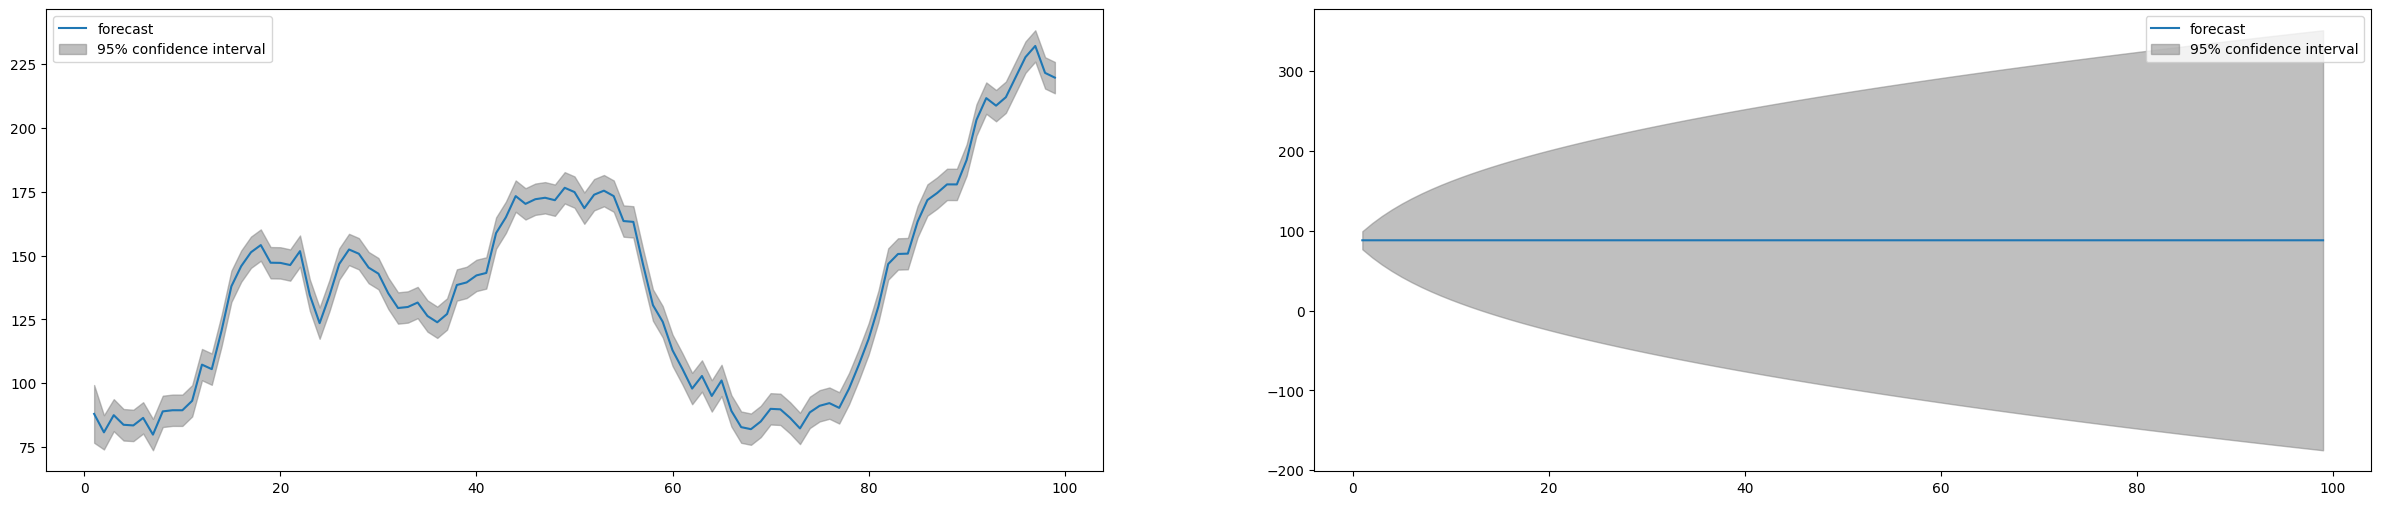

In [18]:
from statsmodels.graphics.tsaplots import plot_predict
fig, axes = plt.subplots(1, 2, figsize=(30, 6))
plot_predict(arima, start=1, dynamic=False, ax=axes[0]);
plot_predict(arima, start=1, dynamic=True, ax=axes[1]);
plt.show()

☝️ `dynamic=False` actually makes use of all available values `y` in order to predict `y_pred`, making your ARIMA prediction use up to $y_{t-1}$ to predict $y_t$. In reality, you don't have access to all `y`, especially if you want to predict several intervals in the future.

👉 Try to use `dynamic=True` to plot a prection of the _last 15 values_ in a situation where the model only have _access to data up to 85_. That is to say, the model:
- predicts 86 based on true [1...85]
- then predicts 87 based on [1...85] _plus_ it's previouly predicted value for 86
- etc...iteratively until 100

☝️ That's still not a _true_ forecast!! Why??

<details>
    <summary>Answer</summary>

Our model has "seen" the whole `y_true` serie during the fitting phase!
</details>

### 3.1 Out-of-sample forecasts (real "future")

👉 Create a train-test-split keep the last 15 datapoints only for the test set, and train your ARIMA on the train set only.

In [19]:
y_train = df[:85]
y_test = df[85:]

model = ARIMA(y_train, order=(1, 1, 1)).fit()

👉 We are "now" in step 85 and have never seen the future:
- Use `.forecast()` method on your fitted model to "forecast" the 15 next datapoints (i.e beyond the end of your train dataset) 
- Plot forecasted values as well as the higher and lower range of 95% uncertainty interval

In [20]:
forecast= model.forecast(len(df), alpha=0.05)
forecast

85     163.161121
86     167.885191
87     171.001580
88     173.057410
89     174.413606
          ...    
180    177.042507
181    177.042507
182    177.042507
183    177.042507
184    177.042507
Name: predicted_mean, Length: 100, dtype: float64

In [26]:
def plot_forecast (fc, train, test, upper=None, lower=None):
    is_confident_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # prepare plot series 
    fc_series = pd.Series(fc, index=test.index)
    upper_series = pd.Series(upper, index=test.index) if is_confident_int else None
    lower_series = pd.Series(lower, index=test.index) if is_confident_int else None
    
    #plot
    plt.figure(figsize=(10,4))
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confident_int:
        plt.fill_between(upper_series.index, upper_series, lower_series.index, lower_series, color='k', alpha=1.5)
    plt.title('forecast vs actual')
    plt.legend(loc='upper left', fontsize=8);
    

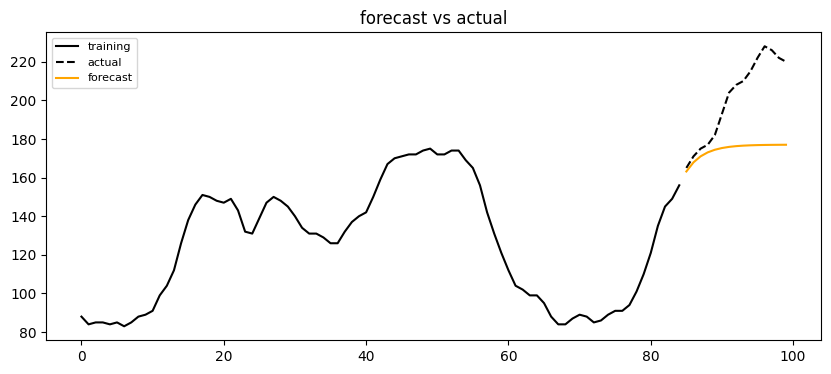

In [27]:
plot_forecast (forecast, y_train, y_test)

👉 Try to also plot your previous 85 `y` real datapoints to better grasp model performance relative to the past

### 3.2 Can you trust your 95% confidence interval? (conditions for inference)

👉 Plot the residuals `model.resid` to ensure there are no patterns
- Normally distributed
- Mean zero
- Uniform variance
- No autoregressive patterns (you can plot_acf the residuals if you really want)

Note: residuals are constructed by 'seing' all data as in `plot_predict(dynamic=False)`

Also try to plot a histogram or kde fit of the residuals to see if they are approximately normally distributed.

In [33]:
residuals = pd.DataFrame(model.resid)
residuals

,0
0,88.000000
1,-4.002382
2,4.223792
3,-2.420731
4,0.137725
...,...
80,3.708440
81,4.942350
82,-1.635991
83,-1.802254


<function matplotlib.pyplot.show(close=None, block=None)>

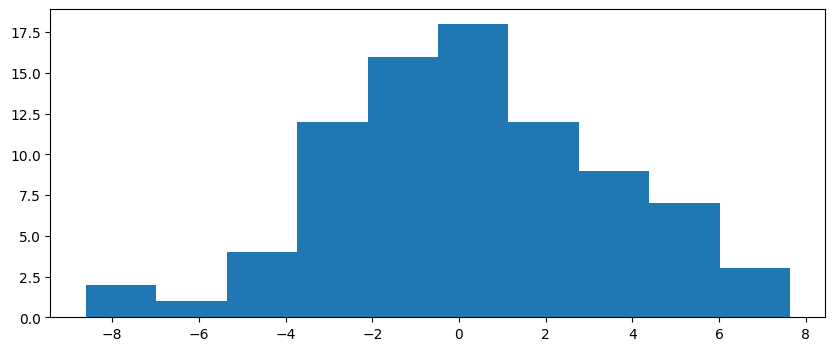

In [36]:
plt.figure(figsize=(10,4))
plt.hist(residuals[1:])
plt.show

## 3.3 Cross-validated performance metrics

👉 Below are the given the most common performance metrics for time series

In [37]:
import numpy as np
from statsmodels.tsa.stattools import acf
def forecast_accuracy(y_pred: pd.Series, y_true: pd.Series) -> float:
    
    mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))  # Mean Absolute Percentage Error
    me = np.mean(y_pred - y_true)             # ME
    mae = np.mean(np.abs(y_pred - y_true))    # MAE
    mpe = np.mean((y_pred - y_true)/y_true)   # MPE
    rmse = np.mean((y_pred - y_true)**2)**.5  # RMSE
    corr = np.corrcoef(y_pred, y_true)[0,1]   # Correlation between the Actual and the Forecast
    mins = np.amin(np.hstack([y_pred.values.reshape(-1,1), y_true.values.reshape(-1,1)]), axis=1)
    maxs = np.amax(np.hstack([y_pred.values.reshape(-1,1), y_true.values.reshape(-1,1)]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(y_pred-y_true, fft=False)[1]                      # Lag 1 Autocorrelation of Error
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

👉 Play with you ARIMA hyper-parameters and see the impact on your forecast performance

In [44]:
y_train = df[:85]
y_test = df[85:]

# On testera les performances du modèle avec le RMSE
hyper_param = [(1, 1, 1),
               (2, 1, 1),
               (3, 1, 1),
               (2, 1, 3),
               (1, 1, 2),
               (3,1,4)]
results = []
for params in hyper_param:
    model = ARIMA(y_train, order=params).fit()
    forecast = model.get_forecast(15).predicted_mean
    fitness = forecast_accuracy(forecast, y_test["x"].iloc[:15])["rmse"]
    results.append({"parameters": params,
                    "root_mean_square_error": fitness})

print(pd.DataFrame(results))


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


  parameters  root_mean_square_error
0  (1, 1, 1)               32.382383
1  (2, 1, 1)               31.798523
2  (3, 1, 1)               22.446229
3  (2, 1, 3)               21.972053
4  (1, 1, 2)               30.264525
5  (3, 1, 4)               39.484118


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## 4 Grid Search
#link to understand Grid Search https://www.lovelyanalytics.com/2017/10/16/grid-search/

Try to run your own gridsearch for (p,d,q) using `pmdarima`. Use at least
- `trace=True`
- `error_action='ignore'`
- `suppress_warnings=True`

In [46]:
import pmdarima as pm
smodel = pm.auto_arima(df,
    start_p = 1, max_p = 4,
    start_q = 1, max_q = 3,
    seasonal = False, 
    trace = True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=564.832, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1277.994, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=529.183, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=531.096, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=534.894, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=532.642, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=526.492, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=564.487, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=538.940, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=528.287, Time=0.13 sec
 

In [48]:
arima = ARIMA(df, order=(2,0,2))
arima = arima.fit()
arima.summary()

# Au vue de la p_value sur le paramètre ma.L1, il vaut mieux ne pas choisir ce modèle et rester sur le premier. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -256.784
Date:                Tue, 14 Mar 2023   AIC                            525.569
Time:                        14:49:23   BIC                            541.200
Sample:                             0   HQIC                           531.895
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.0775     10.595     13.032      0.000     117.311     158.844
ar.L1          1.9281      0.051     37.513      0.000       1.827       2.029
ar.L2         -0.9452      0.052    -18.291      0.000      -1.046      -0.844
ma.L1          0.0230      0.109      0.212      0.832      -0.190       0.236
ma.L2         -0.4524      0.104     -4.348      0.000      -0.656      -0.248
sigma2         9.2747      1.433      6.474      0.000       6.467      12.083
===================================================================================
Ljung-Box (L1) (Q):                   1.14   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.29   Prob(JB):                         0.92
Heteroskedasticity (H):               0.56   Skew:                             0.01
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Cross-validate performance of your model

In practice, Results and GridSearch should always be cross validated: 

Feel free to use [`sklearn.TimeSeriesSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) to create continguous K-folds so as to truely evaluate the performance of your model and find the best hyper-params after cross validation

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0101.png'>

In [92]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# train =
# test = df[1:15], df[16:30],
# Specify the number of folds for cross-validation
n_splits = 5

# Create a time series split object
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize an array to store the RMSE scores for each fold
scores = []

# Loop over each fold
for train, test in tscv.split(df):
    
    # Fit an ARIMA model on the training set for this fold
    model = ARIMA(train, order=(1,1,1))
    model_fit = model.fit()
    
    # Make predictions on the test set
    y_pred = model_fit.forecast(len(test))
    
    # Calculate the RMSE score and append it to the scores list
    score = np.sqrt(mean_squared_error(test, y_pred))
    scores.append(score)

# Print the average RMSE score over all folds
print("Average RMSE score: ", np.mean(scores))
print("folds: ", scores)


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

Average RMSE score:  0.01336570559354352
folds:  [0.00594676246282177, 0.01247292002902775, 0.008149526224775551, 0.022752592873560164, 0.017506726377532363]
